## Task 1: Define the Problem

The problem is to accurately predict housing price in King County, Washington by analyzing various factors such as size, number of bedroom, etc., enabling better decision-making for buyers and sellers and investors.

## Task 2: Import the needed libaries

In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score


## Task 3: Load the data

In [117]:
df = pd.read_csv('data/kc_house_data.csv')

## Task 4: Perform Data Exploratory Analysis (EDA)

In [118]:
# bring in first 5 rows
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [119]:
# bring in 5 random rows 
df.sample(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
5310,8690800130,20141104T000000,390000.0,3,1.5,1650,8676,1.0,0,0,...,8,1130,520,1979,0,98133,47.7471,-122.352,1400,8499
6057,7691800130,20140826T000000,650000.0,3,2.5,2790,6720,2.0,0,0,...,8,2790,0,2002,0,98075,47.5958,-122.038,2620,6720
8416,1612500090,20150331T000000,225800.0,4,1.0,1100,7110,1.0,0,0,...,7,880,220,1907,0,98030,47.3858,-122.227,1150,7110
9501,5423600100,20140805T000000,604000.0,6,3.5,2580,13572,1.0,0,0,...,8,1290,1290,1987,0,98052,47.6796,-122.113,2020,11656
9031,7579200767,20141105T000000,435000.0,2,2.0,1440,1170,2.0,0,0,...,9,960,480,2004,0,98116,47.5592,-122.385,1440,1350


In [120]:
# bring in last 5 rows 
df.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,20141015T000000,325000.0,2,0.75,1020,1076,2.0,0,0,...,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [121]:
# summary of df, including data types and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [122]:
# summary statistics for numerical columns
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [123]:
# dimensions of the df (rows, columns)
df.shape

(21613, 21)

In [124]:
# list all column names
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [125]:
# Find missing values
# Brings back boolean
df.isnull().values.any()

np.False_

In [126]:
# identifies missing values in each column 
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [127]:
# detects duplicate rows
# returns the total number of duplicate rows in df
df.duplicated().sum()

np.int64(0)

## Task 5: Conceptualize the problem (clearly define and frame the issue being address by breaking it down to fundamental components).

In [128]:
X = df['sqft_living'] # Independent variable (feature)
Y = df['price'] # Dependent variable (target)

# If using multiple features
"""
X = df[['sqft_living', 'bedrooms', 'bathrooms']]  # Multiple independent variables
Y = df['price']  # Dependent variable (target)
"""

"\nX = df[['sqft_living', 'bedrooms', 'bathrooms']]  # Multiple independent variables\nY = df['price']  # Dependent variable (target)\n"

In [129]:
# statistical analysis 

# mean
x_mean = X.mean()
y_mean = Y.mean()

# median
x_median = X.median()
y_median = Y.median()

# standard deviation
x_std = X.std()
y_std = Y.std()

In [130]:
summary = pd.DataFrame({
    'Statistic': ['Mean', 'Median', 'Standard Deviation'],
    'Square Footage': [x_mean, x_median, x_std],
    'Price': [y_mean, y_median, y_std]
})

print(summary)

            Statistic  Square Footage          Price
0                Mean     2079.899736  540088.141767
1              Median     1910.000000  450000.000000
2  Standard Deviation      918.440897  367127.196483


In [131]:
# Calculate correlation
# a value closer to 1 indicates a stronger positive relationship between two variables
correlation = X.corr(Y)
print(f"Correlation between square footage and price: {correlation}")

Correlation between square footage and price: 0.7020350546118002


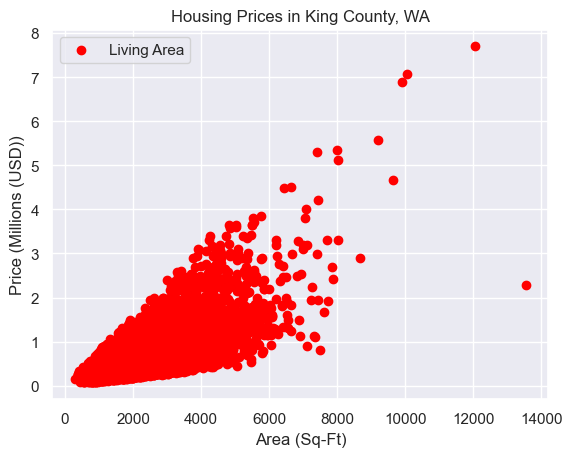

In [132]:
# Scatter plot to visualize the relationship

plt.scatter(X, Y / 1e6, color='red', label="Living Area") # divide by 1e6 to remove the scientific label in y axis
plt.xlabel('Area (Sq-Ft)')
plt.ylabel('Price (Millions (USD))')
plt.title('Housing Prices in King County, WA')
plt.legend()
plt.show()

In [133]:
# in ML many algorithms expect the input features (X) to be in a 2D array format, even if we have one feature
# most models expect X to be a 2D array where each row represents a differenct sample (data point) and each column represents a different feature
# if using multiple features, X would naturally be a 2D array
# ML algorithms often used vectorized operations for efficiencyy, and these operations require consistent dimensions...
# a 2D array ensures that the operation can be applied uniformly across the data

X.values

array([1180, 2570,  770, ..., 1020, 1600, 1020])

In [134]:
# Change X into 2D array
# '-1': This tells NumPy to automatically determine the appropriate number of rows based on the length of X...
# Essentially, it infers the number of rows while keeping the column count as 1.
# '1': This specifies that you want one column in the array, making X a 2D aaray with shape ('n_samples, 1)
X = np.array(X).reshape(-1, 1)

# In supervised learning, the target variable 'Y' is typically expected to be a 1D array, where each element corresponds to the target value for a specific sample
# Most models will understand that 'Y' corresponds to the target variable for the prediction task. 


## Task 6: Perform Data-Split

In [135]:
# X_train and Y_train: These are the features and targets for the training set.
# X_test and Y_test: These are the features and targets for the testing set. 
# test_size=0.3: This specifies that 30% of the data should be allocated to the test set, and 70% to the training set. Ratio can be adjusted.
# random_state=42: This ensures reproducibility of the split. Using a fixed random state value ensures we get the same split everytime the code is ran.
# test_size and random_state are hyperparmaters.
# Hyperparamters are paramaters that are set before the learning process begins
# They control the behavior of the taining process or data preparttion. 
# Unlike model paramaters (like coefficients in linear regression), hyperparameters are not learned from the data...
# but are manually set and tuned to optimize model performance
# Learning Rate: In gradient-based algorithms, it controls how much to adjust the model in response to the estimated error each time the model weights are updated.
# Number of Trees in Random Forest: Controls the number of trees in the forest.
# Number of Epochs in Neural Networks: Determines how many times the learning algorithm will work through the entire training dataset.

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

## Task 7: Choose the ML Method to follow

In [136]:
# Initialize the model
regressor = LinearRegression()

## Task 8: Train the ML model

In [137]:
# fit() method is used to train or "fit" the ML model on the training data.
# it calculates the best parameters for the model based on the training data (coefficients and intercept in linear regression)
# in the context of linear regression, this involves finding the line (hyperplane) that best fits the training data by....
# minimizing the difference between predicted values and the actual valies in the 'Y_train' 
# the model learns from the data by identifying patterns and relationships between the input features and the target variable
# This learning process involves adjusting the model's internal parameters to best captures the underlying trends in the data. 
# After fitting the model, the learned parameters (like the slope and intercept) are stored in the model object ('regressor' in this case)
# These parameters will be used later to make prediction on new data 

regressor.fit(X_train, Y_train)

LinearRegression()

## Task 9: Test the Model

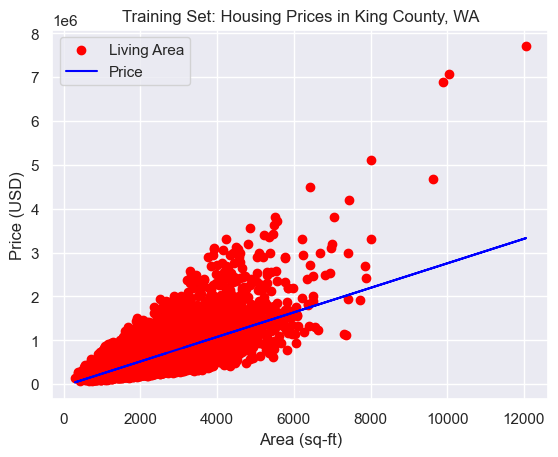

In [138]:
# Visualize the trianing set

# Linear Relationship: If you see a roughly straight-line relationship, then a linear regression model is appropriate.
# Non-Linear Relationship: If the points form a curve or have a pattern that isn’t linear, you might need to consider a different model or transform the data (e.g., using polynomial features).
# Outliers: Look for any points that are far from the rest. These could be outliers that might disproportionately influence the model.

plt.scatter(X_train, Y_train,color="red",label="Living Area")
plt.title("Training Set: Housing Prices in King County, WA")
plt.plot(X_train,regressor.predict(X_train),color="blue",label="Price")
plt.xlabel("Area (sq-ft)")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()


In [139]:
# Make predictions

Y_pred = regressor.predict(X_test)

In [140]:
# Used the trained model to make predictions on the test data

area = 2500

# Predicting the price for a house with 2500 sq-ft area
price = regressor.predict([[area]])

# Since 'price' is an array, we need to access the first element
print('House of %d sq-ft costs about $%d' % (area, price[0]))

House of 2500 sq-ft costs about $656827


In [141]:
area = 5000

price = regressor.predict([[area]])

print('House of %d sq-ft costs about $%d' % (area, price[0]))

House of 5000 sq-ft costs about $1355603


In [142]:
# Evaluate the model 
# Mean Squared Error (MSE): Measures the average of the squares of the errors.
# R² Score: Indicates the proportion of the variance in the dependent variable that is predictable from the independent variables.

mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')

Mean Squared Error: 74509993356.49603
R² Score: 0.48388319278201475


# 

Mean Squared Error (MSE): 74,509,993,356.50
Interpretation: MSE is a measure of the average squared difference between the actual and predicted values. The large value here suggests that on average, the squared difference between the predicted prices and the actual prices is quite high. This could indicate that the model's predictions are not very close to the actual values.

R² Score: 0.4839
Interpretation: The R² score represents the proportion of the variance in the dependent variable (price) that is predictable from the independent variable(s) (like square footage). An R² score of 0.4839 means that approximately 48.4% of the variance in housing prices is explained by the model. This suggests that the model has moderate explanatory power, but there's still a significant portion of the variance in prices that is not being captured by the model.

What This Means for Your Model:
Model Performance: The model has a moderate ability to predict housing prices based on square footage. However, the high MSE and the relatively low R² score suggest that the model may not be capturing all the important factors influencing price, or that the relationship might not be purely linear.

Possible Next Steps:
Include More Features: Consider adding other relevant features to your model, such as the number of bedrooms, bathrooms, location, year built, etc. More features can help the model capture more of the variability in housing prices.

Check for Non-Linearity: The relationship between square footage and price might not be perfectly linear. You could explore polynomial regression or other types of models (like decision trees, random forests, or gradient boosting) that can capture non-linear relationships.

Data Cleaning: Check your data for outliers or anomalies that might be affecting the model’s performance. Removing or properly handling outliers can sometimes improve model accuracy.

Cross-Validation: Use cross-validation to better estimate the performance of your model and to ensure that it generalizes well to unseen data.

Hyperparameter Tuning: Experiment with different model parameters (like the degree of the polynomial in polynomial regression) or different types of models to see if you can improve performance.

In [143]:
# Cross Validation
# Cross-validation is a robust technique to evaluate the performance of your model by splitting the data into multiple training and testing subsets,...
# rather than relying on a single train-test split. This provides a better estimate of the model’s performance and generalization to unseen data.

# By default, it uses 5-fold cross-validation, but you can adjust this using the cv parameter

# Perform 5-fold cross-validation
scores = cross_val_score(regressor, X, Y, cv=5, scoring='neg_mean_squared_error')

# Since the scoring is 'neg_mean_squared_error', take the absolute value and calculate the mean MSE
mse_scores = -scores
mean_mse = mse_scores.mean()

print(f'Cross-Validated Mean Squared Error: {mean_mse}')

# scores: This array contains the MSE for each fold (negated since cross_val_score uses negative MSE for maximization purposes).
# mean_mse: This is the average MSE across all folds, providing a robust estimate of model performance.


Cross-Validated Mean Squared Error: 68429383577.72201


In [144]:
# Using different scoring metrics
# If you want to evaluate the model using a different metric (e.g., R²), you can specify the scoring parameter:

# Cross-validation using R² as the scoring metric
r2_scores = cross_val_score(regressor, X, Y, cv=5, scoring='r2')

mean_r2 = r2_scores.mean()

print(f'Cross-Validated R² Score: {mean_r2}')

Cross-Validated R² Score: 0.4910862905377124


Overfitting: This occurs when a model learns not only the underlying patterns in the training data but also the noise and specific details that do not generalize well to new, unseen data. An overfitted model performs very well on the training data but poorly on test data.

Underfitting: This happens when a model is too simple to capture the underlying patterns in the data, resulting in poor performance on both the training and test data. An underfitted model fails to capture the complexity of the data.

Overfitting: Cross-validation helps detect overfitting by revealing when a model performs well on some subsets of data but poorly on others, indicating that it might be too tailored to specific data points rather than generalizing well.

Underfitting: Cross-validation helps identify underfitting by showing consistently poor performance across all folds, suggesting that the model is too simple to capture the underlying data patterns.


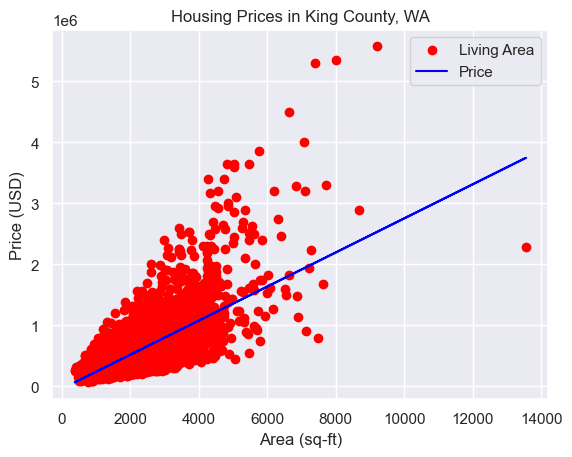

In [145]:
# Visualize the Results

plt.scatter(X_test, Y_test, color="red",label="Living Area")
plt.title("Housing Prices in King County, WA")
plt.plot(X_test, Y_pred,color="blue",label="Price")
plt.xlabel("Area (sq-ft)")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()

In [146]:
# Interpret the Results
# Coefficients: You can also check the coefficients of the linear regression model to see the relationship between the features and the target.

print(f'Intercept: {regressor.intercept_}')
print(f'Coefficients: {regressor.coef_}')

Intercept: -41947.4540187621
Coefficients: [279.51011741]


1. Intercept: -41947.45
Interpretation: The intercept is the value of the target variable (price) when all the independent variables (features) are zero. In this case, if the square footage (sqft_living) were zero, the model predicts that the price would be approximately -41947.45 dollars.
Significance: While a negative intercept might not make practical sense (since you can't have a negative price or a house with zero square footage), it’s important to remember that the intercept is a part of the mathematical equation used to fit the best line through the data points. The intercept simply adjusts the line vertically to minimize the overall error.
2. Coefficient: [279.51]
Interpretation: The coefficient represents the change in the target variable (price) for a one-unit change in the independent variable (sqft_living). In this case, the model suggests that for every additional square foot of living space, the price increases by approximately 279.51 dollars.
Significance: This coefficient indicates the strength and direction of the relationship between square footage and price. A positive coefficient means that as square footage increases, the predicted price also increases, which aligns with common expectations in real estate.

## Rerun with additonal features 

In [147]:
X = df[['sqft_living', 'bedrooms', 'bathrooms']]  # Multiple independent variables
Y = df['price']  # Dependent variable (target)

In [148]:
X.values # no need to make an 2D array since multiple features

array([[1.18e+03, 3.00e+00, 1.00e+00],
       [2.57e+03, 3.00e+00, 2.25e+00],
       [7.70e+02, 2.00e+00, 1.00e+00],
       ...,
       [1.02e+03, 2.00e+00, 7.50e-01],
       [1.60e+03, 3.00e+00, 2.50e+00],
       [1.02e+03, 2.00e+00, 7.50e-01]])

In [149]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [150]:
regressor = LinearRegression()

In [151]:
regressor.fit(X_train, Y_train)

LinearRegression()

In [152]:
# Perform 5-fold cross-validation
scores = cross_val_score(regressor, X, Y, cv=5, scoring='neg_mean_squared_error')

# Since the scoring is 'neg_mean_squared_error', take the absolute value and calculate the mean MSE
mse_scores = -scores
mean_mse = mse_scores.mean()

print(f'Cross-Validated Mean Squared Error: {mean_mse}')


Cross-Validated Mean Squared Error: 66623867267.77258


In [153]:
# Cross-validation using R² as the scoring metric
r2_scores = cross_val_score(regressor, X, Y, cv=5, scoring='r2')

mean_r2 = r2_scores.mean()

print(f'Cross-Validated R² Score: {mean_r2}')

Cross-Validated R² Score: 0.5042762465772765


In [154]:
# Convert the date-time string to a datetime object due to error cannot convert string to float in correlation matrix
df['date'] = pd.to_datetime(df['date'])


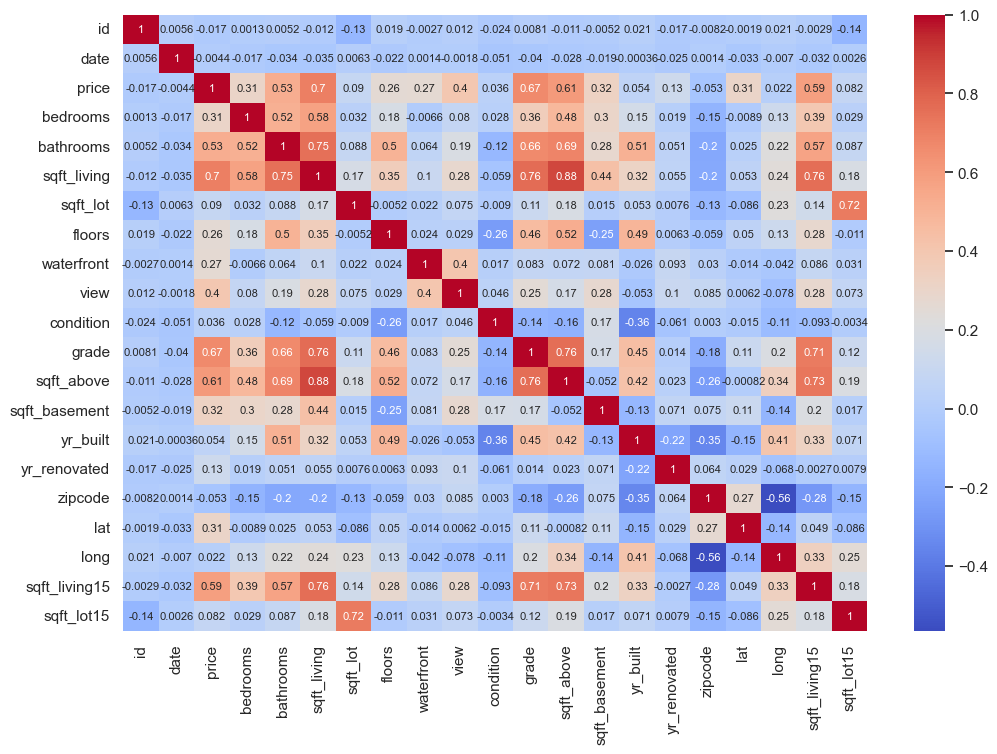

In [155]:
# Correlation Matrix
# A correlation matrix shows the correlation coefficients between each pair of features and the target variable.
# Features with a high correlation with the target variable are typically more predictive.
# Look for features that have a strong positive or negative correlation with the target variable (e.g., close to 1 or -1).
# Features with low or near-zero correlation may not be useful.

plt.figure(figsize=(12, 8)) ## Adjust the figure size as needed
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', annot_kws={"size": 8})  # Reduce font size for annotations
plt.show()

In [156]:
df['condition'].value_counts()

condition
3    14031
4     5679
5     1701
2      172
1       30
Name: count, dtype: int64

In [157]:
df['grade'].value_counts()

grade
7     8981
8     6068
9     2615
6     2038
10    1134
11     399
5      242
12      90
4       29
13      13
3        3
1        1
Name: count, dtype: int64

In [158]:
X = df[['sqft_living', 'bedrooms', 'bathrooms', 'condition', 'grade',]]  # Multiple independent variables
Y = df['price']  # Dependent variable (target)

In [159]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [160]:
regressor = LinearRegression()

In [161]:
regressor.fit(X_train, Y_train)

LinearRegression()

In [162]:
# Perform 5-fold cross-validation
scores = cross_val_score(regressor, X, Y, cv=5, scoring='neg_mean_squared_error')

# Since the scoring is 'neg_mean_squared_error', take the absolute value and calculate the mean MSE
mse_scores = -scores
mean_mse = mse_scores.mean()

print(f'Cross-Validated Mean Squared Error: {mean_mse}')


Cross-Validated Mean Squared Error: 60011735647.60962


In [163]:
# Cross-validation using R² as the scoring metric
r2_scores = cross_val_score(regressor, X, Y, cv=5, scoring='r2')

mean_r2 = r2_scores.mean()

print(f'Cross-Validated R² Score: {mean_r2}')

Cross-Validated R² Score: 0.5539583691609931


In [164]:
# Make predictions

Y_pred = regressor.predict(X_test)

In [165]:
# Used the trained model to make predictions on the test data

sqft_living = 2500
bedrooms = 3
bathrooms = 2
condition = 5
grade = 7

# Define your feature names (the same ones used during model training)
feature_names = ['sqft_living', 'bedrooms', 'bathrooms', 'condition', 'grade']

# Creating an input array with all 5 features
input_features = pd.DataFrame([[sqft_living, bedrooms, bathrooms, condition, grade]], columns=feature_names)

# Predicting the price
price = regressor.predict(input_features)

# Output the prediction
print('House of %d sq-ft costs about $%d' % (area, price[0]))

House of 5000 sq-ft costs about $679349
